# ✓ 필요한 라이브러리 import 하기

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


print('얍💢')


얍💢


# ✓ 데이터 경로 지정하기

In [2]:
# data_dir = os.getenv('HOME')+'/aiffel/kaggle/Hackathon_0208/data'
data_dir = os.getenv('HOME')+'/workplace/kaggle_contest/competitive-data-science-predict-future-sales/'

train_data_path = join(data_dir, 'sales_train.csv')
test_data_path = join(data_dir, 'test.csv')      # 테스트, 즉 submission 시 사용할 데이터 경로
item_category_path = join(data_dir,'item_categories.csv')
items_data_path = join(data_dir,'items.csv')
shops_data_path = join(data_dir,'shops.csv')
# test_data_path = join(data_dir,'test.csv')
sub_data_path = join(data_dir,'sample_submission.csv')

print(train_data_path)
print(test_data_path)
print(item_category_path)
print(items_data_path)
print(shops_data_path)
print(sub_data_path)

/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/sales_train.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/test.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/item_categories.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/items.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/shops.csv
/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/sample_submission.csv


# 1. 데이터 살펴보기
# ✓ 데이터 불러오기

In [3]:
train_data = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path,index_col=0)
item_category= pd.read_csv(item_category_path)
items = pd.read_csv(items_data_path)
shops =pd.read_csv(shops_data_path)
sub = pd.read_csv(sub_data_path)


print('train data dim : {}'.format(train_data.shape))
print('test data dim : {}'.format(test.shape))
print('item category data dim : {}'.format(item_category.shape))
print('items data dim : {}'.format(items.shape))
print('shops data dim : {}'.format(shops.shape))
print('sub data dim : {}'.format(sub.shape))


train data dim : (2935849, 6)
test data dim : (214200, 2)
item category data dim : (84, 2)
items data dim : (22170, 3)
shops data dim : (60, 2)
sub data dim : (214200, 2)


In [4]:
train_data.head(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0
2,05.01.2013,0,25,2552,899.0,-1.0


In [5]:
train_data.tail(3) 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0
2935848,03.10.2015,33,25,7460,299.0,1.0


In [6]:
test.head(5) 

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


In [7]:
item_category.head(5)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [8]:
items.head(5) 

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [9]:
shops.head(5)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [10]:
sub.head(5)

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [11]:

print("train data 중복 수:",sum(train_data.duplicated()))

print("test  data 중복 수:",sum(test.duplicated()))


train data 중복 수: 6
test  data 중복 수: 0


### 중복 행 출력

In [12]:
train_data[train_data.duplicated() == True]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
76962,05.01.2013,0,54,20130,149.0,1.0
1435367,23.02.2014,13,50,3423,999.0,1.0
1496766,23.03.2014,14,21,3423,999.0,1.0
1671873,01.05.2014,16,50,3423,999.0,1.0
1866340,12.07.2014,18,25,3423,999.0,1.0
2198566,31.12.2014,23,42,21619,499.0,1.0


### 중복 행 제거

In [13]:
# 중복 제거
train_data.drop_duplicates(inplace=True)

In [14]:
# 중복 재확인
sum(train_data.duplicated())

0

### 결측치 확인

In [15]:
#train데이터 결측치 확인
train_data.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [16]:
#test데이터 결측치 확인
test.isnull().sum()

shop_id    0
item_id    0
dtype: int64

### outlier (극단치) 제거

```
극단치란
통계적 자료 분석의 결과를 왜곡시키거나, 자료 분석의 적절성을 위협하는 변숫값 

1000과 2000이상의 동떨어진 데이터 들이 존재한다.
우리는 500이하로 범위로 좁혀주자.
```

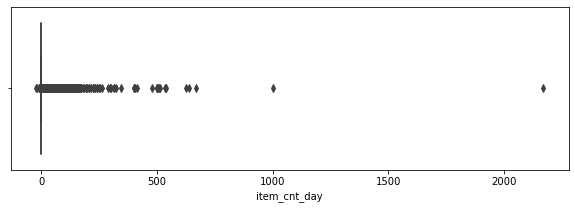

In [17]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

In [18]:
#outlier (극단치) 제거
train_data = train_data[train_data.item_cnt_day < 500]

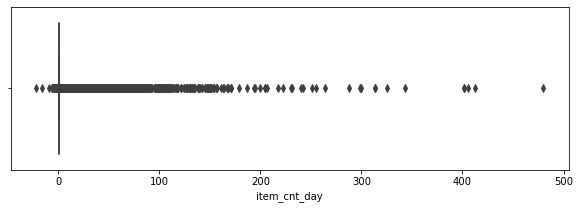

In [19]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

In [20]:
### 음수값도 제거 해주자.

In [21]:
train_data = train_data[train_data.item_cnt_day >= 0]

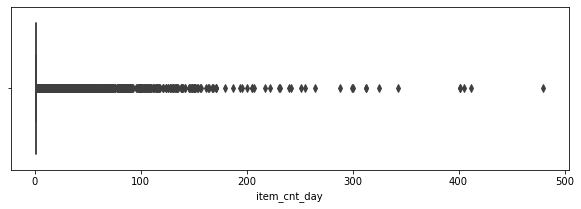

In [22]:
plt.figure(figsize=(10,3))
sns.boxplot(x='item_cnt_day', data=train_data);

In [23]:
print('train data dim : {}'.format(train_data.shape))

train data dim : (2928473, 6)


2935849 -> 2928473로 변경

In [24]:
# train_data.drop(['item_price','date'], axis=1)

In [25]:
test['date_block_num'] = '34'
test['date_block_num'] = test['date_block_num'].apply(int)
test

,shop_id,item_id,date_block_num
ID,,,
0,5,5037,34
1,5,5320,34
2,5,5233,34
3,5,5232,34
4,5,5268,34
...,...,...,...
214195,45,18454,34
214196,45,16188,34
214197,45,15757,34


In [26]:
total_data = pd.concat([train_data, test], ignore_index=True, sort=False)
total_data.fillna(0, inplace=True) # 34 month

In [27]:
total_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,06.01.2013,0,25,2554,1709.05,1.0
3,15.01.2013,0,25,2555,1099.00,1.0
4,10.01.2013,0,25,2564,349.00,1.0
...,...,...,...,...,...,...
3142668,0,34,45,18454,0.00,0.0
3142669,0,34,45,16188,0.00,0.0
3142670,0,34,45,15757,0.00,0.0
3142671,0,34,45,19648,0.00,0.0


In [28]:
total_data = pd.merge(total_data, shops, on=['shop_id'], how='left')
total_data = pd.merge(total_data, items, on=['item_id'], how='left')
total_data = pd.merge(total_data, item_category, on=['item_category_id'], how='left')
total_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,"Ярославль ТЦ ""Альтаир""",ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,06.01.2013,0,25,2554,1709.05,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
3,15.01.2013,0,25,2555,1099.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
4,10.01.2013,0,25,2564,349.00,1.0,"Москва ТРК ""Атриум""",DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео
...,...,...,...,...,...,...,...,...,...,...
3142668,0,34,45,18454,0.00,0.0,"Самара ТЦ ""ПаркХаус""",СБ. Союз 55,55,Музыка - CD локального производства
3142669,0,34,45,16188,0.00,0.0,"Самара ТЦ ""ПаркХаус""",Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры
3142670,0,34,45,15757,0.00,0.0,"Самара ТЦ ""ПаркХаус""",НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства
3142671,0,34,45,19648,0.00,0.0,"Самара ТЦ ""ПаркХаус""",ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD


In [29]:
total_data = total_data.drop(['date','item_price','shop_name','item_name','item_category_name'], axis=1)
total_data

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id
0,0,59,22154,1.0,37
1,0,25,2552,1.0,58
2,0,25,2554,1.0,58
3,0,25,2555,1.0,56
4,0,25,2564,1.0,59
...,...,...,...,...,...
3142668,34,45,18454,0.0,55
3142669,34,45,16188,0.0,64
3142670,34,45,15757,0.0,55
3142671,34,45,19648,0.0,40


In [30]:
total_data['month'] = total_data['date_block_num'] % 12
total_data

,date_block_num,shop_id,item_id,item_cnt_day,item_category_id,month
0,0,59,22154,1.0,37,0
1,0,25,2552,1.0,58,0
2,0,25,2554,1.0,58,0
3,0,25,2555,1.0,56,0
4,0,25,2564,1.0,59,0
...,...,...,...,...,...,...
3142668,34,45,18454,0.0,55,10
3142669,34,45,16188,0.0,64,10
3142670,34,45,15757,0.0,55,10
3142671,34,45,19648,0.0,40,10


In [31]:
X_train = total_data[total_data.date_block_num < 34].drop(['item_cnt_day'], axis=1)
Y_train = total_data[total_data.date_block_num < 34]['item_cnt_day']
# X_valid = total_data[total_data.date_block_num == 33].drop(['item_cnt_day'], axis=1)
# Y_valid = total_data[total_data.date_block_num == 33]['item_cnt_day']
X_test = total_data[total_data.date_block_num == 34].drop(['item_cnt_day'], axis=1)

In [32]:
del total_data

## LMS 노드 참고

In [33]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]

print('얍💢')

얍💢


In [34]:
X_train

,date_block_num,shop_id,item_id,item_category_id,month
0,0,59,22154,37,0
1,0,25,2552,58,0
2,0,25,2554,58,0
3,0,25,2555,56,0
4,0,25,2564,59,0
...,...,...,...,...,...
2928468,33,25,7409,55,9
2928469,33,25,7460,55,9
2928470,33,25,7459,55,9
2928471,33,25,7440,57,9


In [35]:
Y_train

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
2928468    1.0
2928469    1.0
2928470    1.0
2928471    1.0
2928472    1.0
Name: item_cnt_day, Length: 2928473, dtype: float64

In [36]:
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019).get_n_splits(X_train.values)
    for m in models:
        print("Model {} CV score : {:.4f}".format(m['name'], np.mean(cross_val_score(m['model'], X_train.values, Y_train)), 
                                                  kf=kfold))
print('얍💢')

얍💢


In [37]:
get_cv_score(models)

Model GradientBoosting CV score : 0.1029
Model XGBoost CV score : 0.0402
Model LightGBM CV score : 0.1497


##### 여기까지

In [74]:
def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)

In [75]:
y_pred = AveragingBlending(models, X_train, Y_train, X_test)
print(len(y_pred))
y_pred

214200


array([1.10389163, 1.04556623, 1.10389163, ..., 1.00035546, 1.04247014,
       1.04415109])

In [76]:
data_dir = os.getenv('HOME')+'/workplace/kaggle_contest/competitive-data-science-predict-future-sales/'

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [77]:
result = pd.DataFrame({
    'ID' : sub.ID, 
    'item_cnt_month' : y_pred
})

result.head()

,ID,item_cnt_month
0,0,1.103892
1,1,1.045566
2,2,1.103892
3,3,1.048500
4,4,1.293073


In [78]:
my_submission_path = join(data_dir, 'submission.csv')
result.to_csv(my_submission_path, index=False)

print(my_submission_path)

/home/aiffel-dj22/workplace/kaggle_contest/competitive-data-science-predict-future-sales/submission.csv
